In [160]:
import pandas as pd
df = pd.read_csv('segmentacao.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              2240 non-null   int64  
 1   ano_nascimento          2240 non-null   int64  
 2   nivel_educacao          2240 non-null   object 
 3   estado_civil            2240 non-null   object 
 4   criancas_ate_dez_anos   2240 non-null   int64  
 5   criancas_mais_dez_anos  2240 non-null   int64  
 6   data_entrada            2240 non-null   object 
 7   resposta_campanha       2240 non-null   int64  
 8   renda_anual             2240 non-null   int64  
 9   idade                   2240 non-null   int64  
 10  ultima_transancao       2230 non-null   object 
 11  total_vinho             2240 non-null   int64  
 12  total_frutas            2240 non-null   int64  
 13  total_carnes            2240 non-null   int64  
 14  total_peixes            2240 non-null   

,id_cliente,ano_nascimento,nivel_educacao,estado_civil,criancas_ate_dez_anos,criancas_mais_dez_anos,data_entrada,resposta_campanha,renda_anual,idade,...,total_frutas,total_carnes,total_peixes,total_doces,total_outros,total_compras,data_transacao,lugar_transacao,Unnamed: 20,frequencia
0,5524,1957,Grado o superior,Soltero,0,0,2020-09-04,1,58138,67,...,88,546,172,88,88,1617,44078.0,en línea,NaN,12
1,2174,1954,Grado o superior,Soltero,1,1,2022-03-08,0,46344,70,...,1,6,2,1,6,27,44628.0,en línea,NaN,3
2,4141,1965,Grado o superior,Unión de hecho,0,0,2021-08-21,0,71613,59,...,49,127,111,21,42,776,44429.0,en línea,NaN,18
3,6182,1984,Grado o superior,Unión de hecho,1,0,2022-02-10,0,26646,40,...,4,20,10,3,5,53,44602.0,en línea,NaN,6
4,5324,1981,Posgrado,Casado,1,0,2022-01-19,0,58293,43,...,43,118,46,27,15,422,44580.0,en línea,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Grado o superior,Casado,0,1,2021-06-13,0,61223,57,...,43,182,42,118,247,1341,44360.0,en línea,NaN,13
2236,4001,1946,Posgrado,Unión de hecho,2,1,2022-06-10,0,64014,78,...,0,30,0,0,8,444,44722.0,en línea,NaN,13
2237,7270,1981,Grado o superior,Divorciado,0,0,2022-01-25,0,56981,43,...,48,217,32,12,24,1241,44586.0,en línea,NaN,15
2238,8235,1956,Posgrado,Unión de hecho,0,1,2022-01-24,0,69245,68,...,30,214,80,30,61,843,44585.0,en línea,NaN,16


In [161]:
# Suponha que queremos remover a coluna 'lugar_transacao'
df = df.drop(columns=['data_transacao'])
df = df.drop(columns=['ano_nascimento'])
df = df.drop(columns=['Unnamed: 20'])

# Converter colunas de data para datetime e alterar o formato
df['data_entrada'] = pd.to_datetime(df['data_entrada']).dt.strftime('%Y-%m-%d')
df['ultima_transancao'] = pd.to_datetime(df['ultima_transancao'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')
df['data_entrada'] = pd.to_datetime(df['data_entrada'], format='%Y-%m-%d')
df['ultima_transancao'] = pd.to_datetime(df['ultima_transancao'], format='%Y-%m-%d')

# Verificar a conversão
print(df[['data_entrada', 'ultima_transancao']].head())

# Verificar as colunas restantes
print(df.columns)
df.info()

  data_entrada ultima_transancao
0   2020-09-04        2022-07-23
1   2022-03-08        2022-11-28
2   2021-08-21        2022-10-09
3   2022-02-10        2022-11-19
4   2022-01-19        2022-11-09
Index(['id_cliente', 'nivel_educacao', 'estado_civil', 'criancas_ate_dez_anos',
       'criancas_mais_dez_anos', 'data_entrada', 'resposta_campanha',
       'renda_anual', 'idade', 'ultima_transancao', 'total_vinho',
       'total_frutas', 'total_carnes', 'total_peixes', 'total_doces',
       'total_outros', 'total_compras', 'lugar_transacao', 'frequencia'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_cliente              2240 non-null   int64         
 1   nivel_educacao          2240 non-null   object        
 2   estado_civil            2240 non-null   object        
 3   crianca

 Análise Exploratória dos Dados

In [162]:
# Descrição estatística das variáveis numéricas
print(df.describe())

         id_cliente  criancas_ate_dez_anos  criancas_mais_dez_anos  \
count   2240.000000            2240.000000             2240.000000   
mean    5592.159821               0.444196                0.506250   
min        0.000000               0.000000                0.000000   
25%     2828.250000               0.000000                0.000000   
50%     5458.500000               0.000000                0.000000   
75%     8427.750000               1.000000                1.000000   
max    11191.000000               2.000000                2.000000   
std     3246.662198               0.538398                0.544538   

                        data_entrada  resposta_campanha    renda_anual  \
count                           2240        2240.000000    2240.000000   
mean   2021-07-10 10:01:42.857142784           0.149107   52247.248661   
min              2020-07-30 00:00:00           0.000000    1730.000000   
25%              2021-01-16 00:00:00           0.000000   35538.750000   

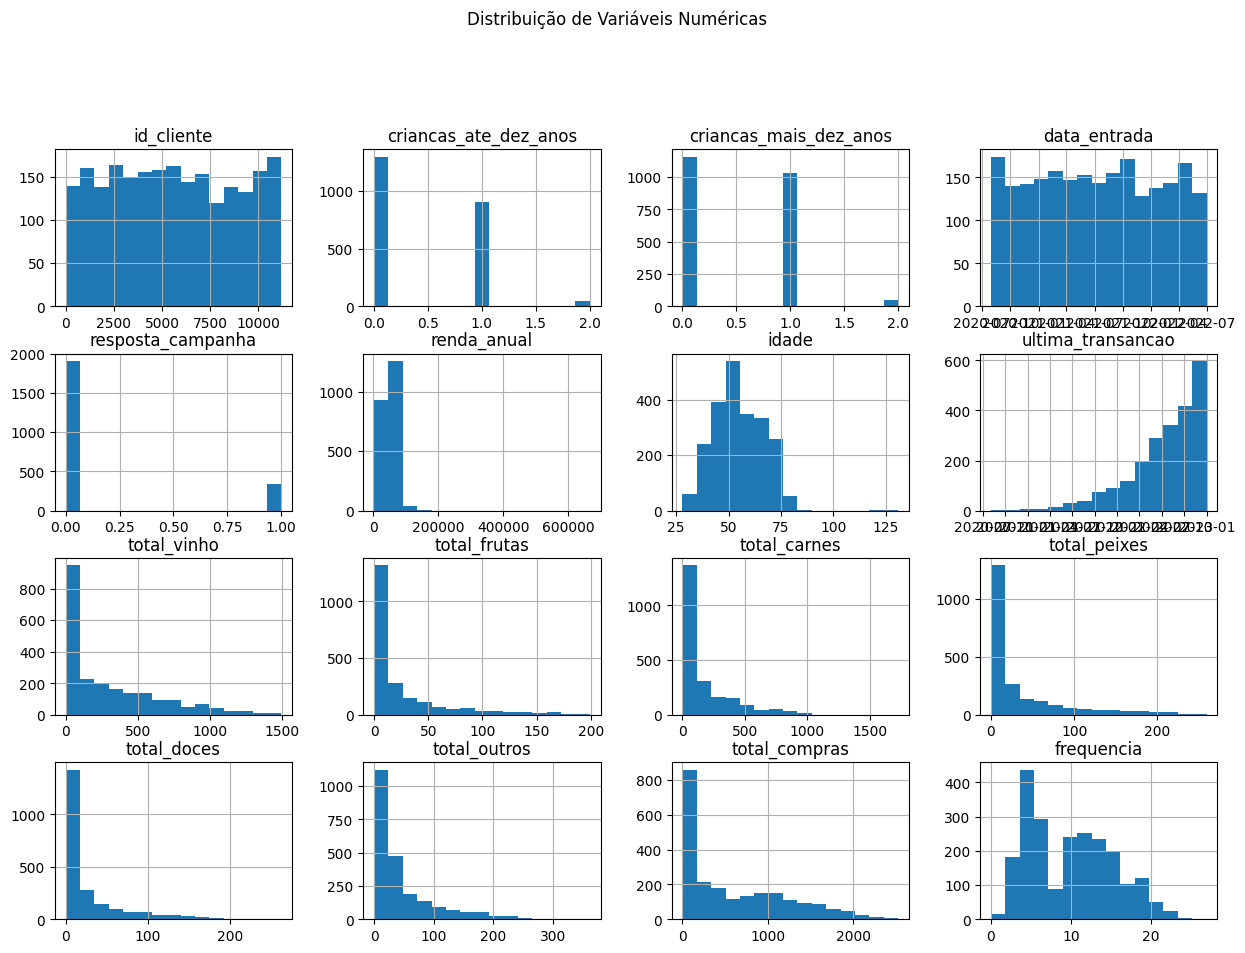

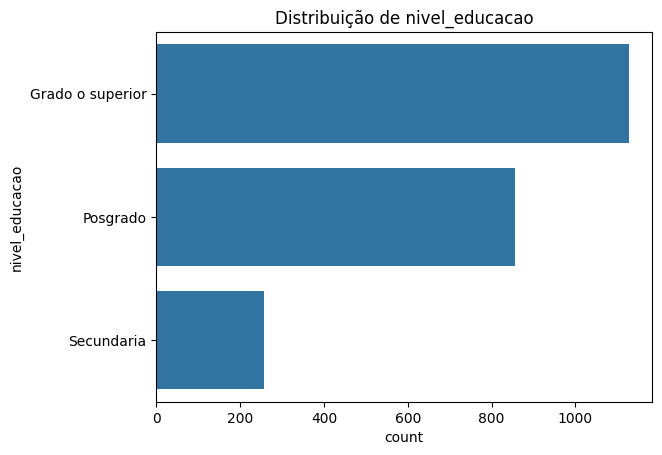

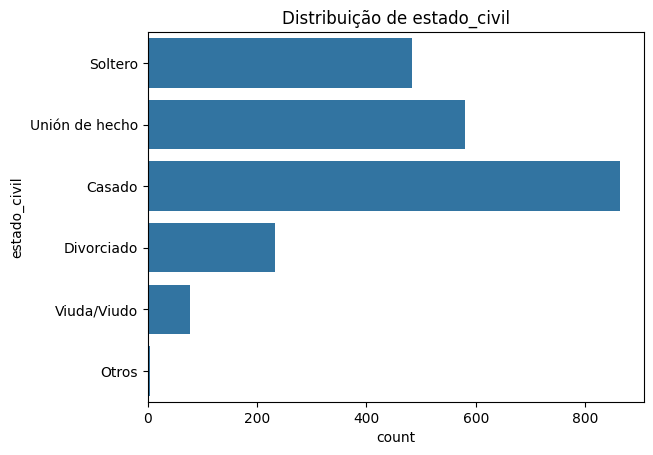

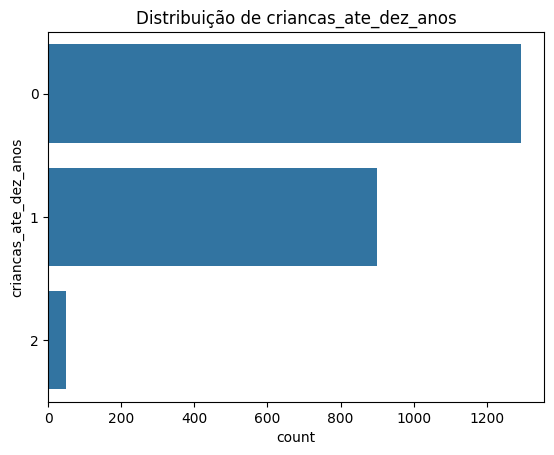

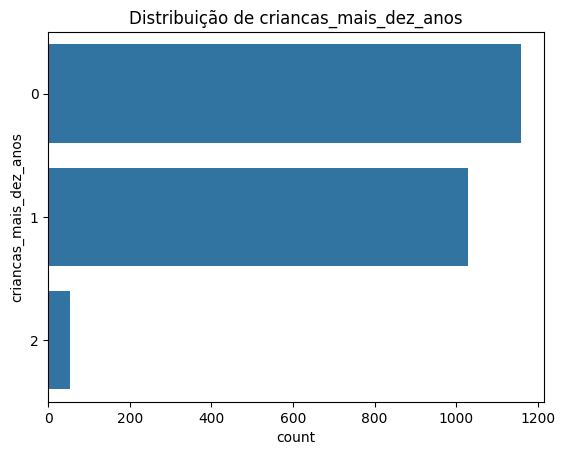

In [163]:
#Distribuição de Variáveis
import seaborn as sns
import matplotlib.pyplot as plt

# Histogramas para variáveis numéricas
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribuição de Variáveis Numéricas', y=1.02)
plt.show()

# Contagem de variáveis categóricas
categorical_columns = ['nivel_educacao', 'estado_civil', 'criancas_ate_dez_anos', 'criancas_mais_dez_anos']
for column in categorical_columns:
    sns.countplot(y=column, data=df)
    plt.title(f'Distribuição de {column}')
    plt.show()


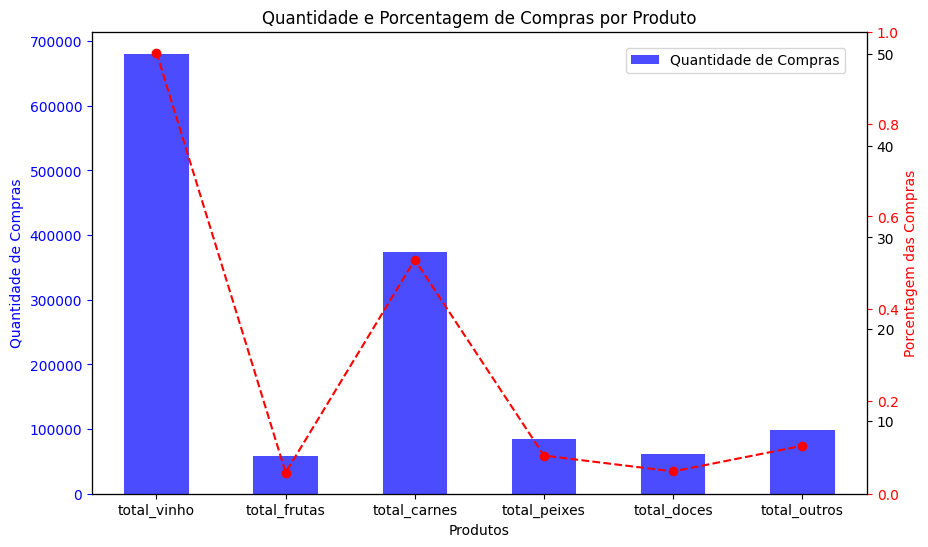

In [164]:
# Agrupe os dados por produto e calcule a soma
produtos = df[['total_vinho', 'total_frutas', 'total_carnes', 'total_peixes', 'total_doces', 'total_outros']].sum()

# Calcule o total de compras
total_compras = df['total_compras'].sum()

# Calcule as percentagens
percentagens = produtos / total_compras * 100

# Plotagem
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotar barras para cada produto
produtos.plot(kind='bar', ax=ax1, color='b', alpha=0.7, label='Quantidade de Compras')

# Plotar linhas para as percentagens
percentagens.plot(kind='line', marker='o', linestyle='--', color='r', secondary_y=True, label='Porcentagem das Compras')

# Definir rótulos dos eixos
ax1.set_ylabel('Quantidade de Compras', color='b')
ax1.set_xlabel('Produtos')
ax1.tick_params(axis='y', colors='b')

# Adicionar legenda
ax1.legend(loc='upper left', bbox_to_anchor=(0.68, 0.98))

# Adicione uma segunda escala de eixo y para as percentagens
ax2 = ax1.twinx()
ax2.set_ylabel('Porcentagem das Compras', color='r')
ax2.tick_params(axis='y', colors='r')

# Exiba o gráfico
plt.title('Quantidade e Porcentagem de Compras por Produto')
plt.show()


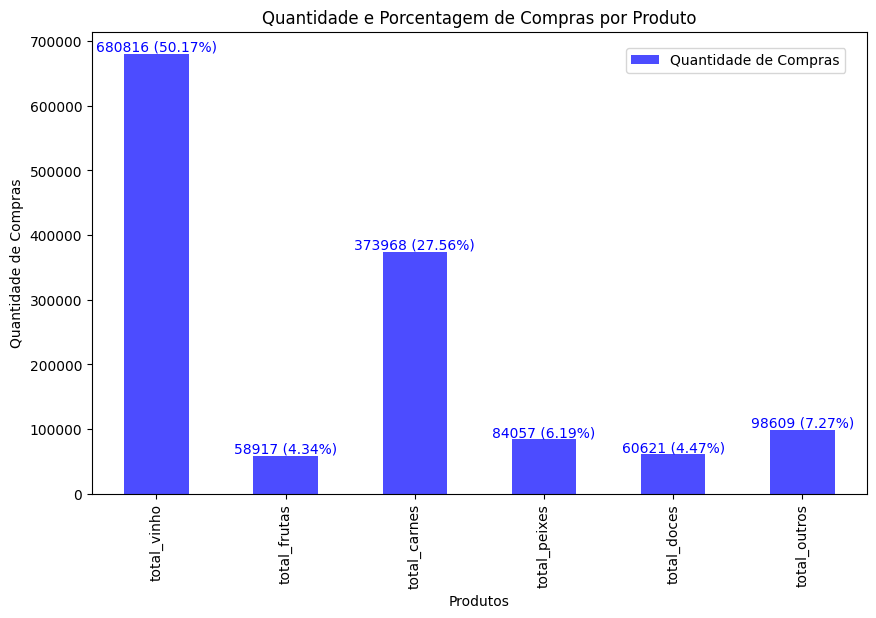

In [165]:
# Agrupe os dados por produto e calcule a soma
produtos = df[['total_vinho', 'total_frutas', 'total_carnes', 'total_peixes', 'total_doces', 'total_outros']].sum()

# Calcule o total de compras
total_compras = df['total_compras'].sum()

# Calcule as percentagens
percentagens = produtos / total_compras * 100

# Plotagem
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotar barras para cada produto com os valores percentuais médios
bars = produtos.plot(kind='bar', ax=ax1, color='b', alpha=0.7, label='Quantidade de Compras')
for i, v in enumerate(produtos):
    ax1.text(i, v, f'{v} ({percentagens[i]:.2f}%)', ha='center', va='bottom', color='b')

# Adicionar legenda
ax1.legend(loc='upper left', bbox_to_anchor=(0.68, 0.98))

# Definir rótulos dos eixos
ax1.set_ylabel('Quantidade de Compras')
ax1.set_xlabel('Produtos')

# Adicione títulos
plt.title('Quantidade e Porcentagem de Compras por Produto')

# Exiba o gráfico
plt.show()


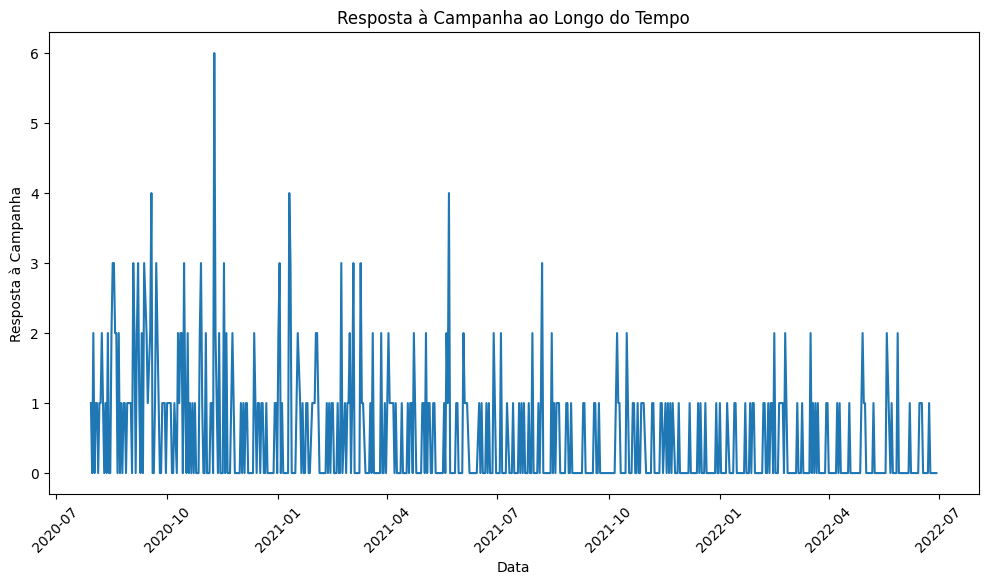

In [95]:
# Agrupar os dados pela data e somar as respostas da campanha
campanha_por_data = df.groupby('data_entrada')['resposta_campanha'].sum().reset_index()

# Plotar o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(x='data_entrada', y='resposta_campanha', data=campanha_por_data)
plt.title('Resposta à Campanha ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Resposta à Campanha')
plt.xticks(rotation=45)
plt.show()


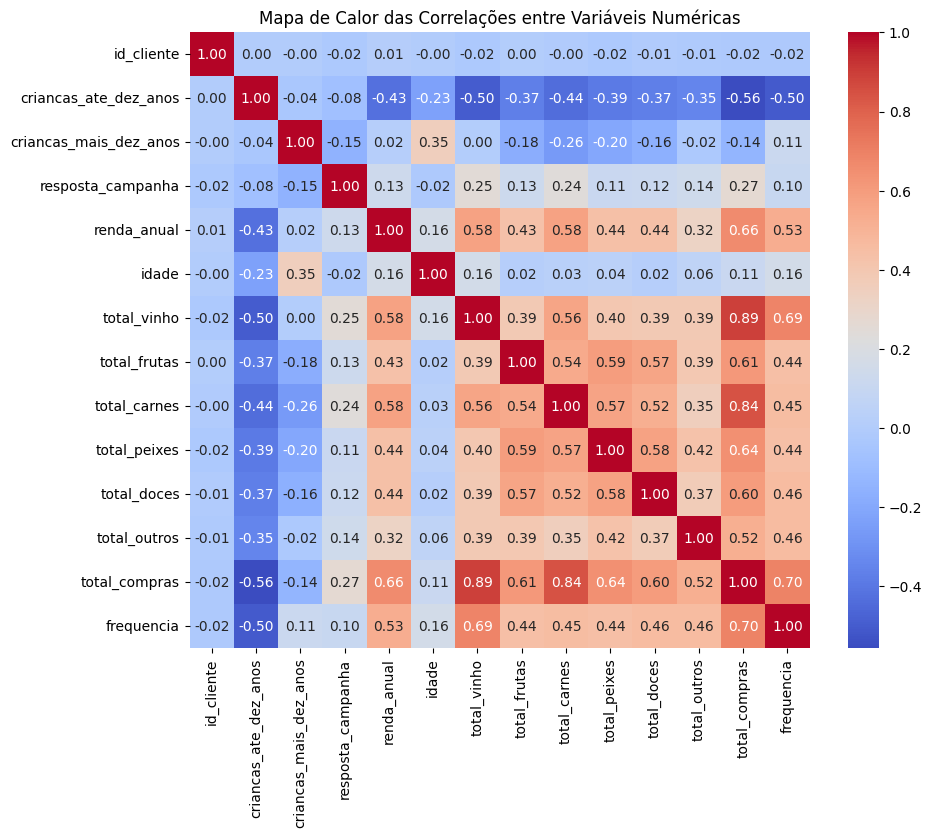

In [166]:
#Correlação entre Variáveis
# Selecionar apenas colunas numéricas
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calcular a matriz de correlação
correlation_matrix = numerical_df.corr()

# Plotar o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor das Correlações entre Variáveis Numéricas')
plt.show()


**Preparação para Segmentação RFM**

Calcular os valores RFM

In [101]:
def calculate_rfm(df):
    # Calcular recency
    df['recency'] = (pd.Timestamp.now() - df['ultima_transancao']).dt.days

    # Selecionar apenas as colunas necessárias
    rfm = df[['id_cliente', 'recency', 'frequencia', 'total_compras']]

    # Renomear a coluna de frequência para corresponder ao padrão
    rfm.rename(columns={'frequencia': 'frequency'}, inplace=True)

    return rfm

# Utilize a função com o seu dataframe
rfm = calculate_rfm(df)
print(rfm)
print(rfm.describe())

      id_cliente  recency  frequency  total_compras
0           5524    672.0         12           1617
1           2174    544.0          3             27
2           4141    594.0         18            776
3           6182    553.0          6             53
4           5324    563.0         11            422
...          ...      ...        ...            ...
2235       10870    610.0         13           1341
2236        4001    517.0         13            444
2237        7270    511.0         15           1241
2238        8235    551.0         16            843
2239        9405    616.0          7            172

[2240 rows x 4 columns]
         id_cliente      recency    frequency  total_compras
count   2240.000000  2230.000000  2240.000000    2240.000000
mean    5592.159821   679.743049     9.875000     605.798214
std     3246.662198   146.509506     5.231872     602.249288
min        0.000000   511.000000     0.000000       5.000000
25%     2828.250000   565.000000     5.000000 

<ipython-input-101-206741728118>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm.rename(columns={'frequencia': 'frequency'}, inplace=True)


In [103]:
# 1. Calcular os Scores R, F e M
rfm['R_Score'] = pd.qcut(rfm['recency'], 5, labels=False, duplicates='drop') + 1
rfm['F_Score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=False, duplicates='drop') + 1
rfm['M_Score'] = pd.qcut(rfm['total_compras'], 5, labels=False, duplicates='drop') + 1

# 2. Calcular o Score Total RFM
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

# Selecionar as colunas para clustering
X = rfm[['R_Score', 'F_Score', 'M_Score']]

# Definir o número de clusters
n_clusters = 4

# Visualizar os dados RFM com clusters
print(rfm.head())
print(rfm.describe())
rfm

   id_cliente  recency  frequency  total_compras  R_Score  F_Score  M_Score  \
0        5524    672.0         12           1617      3.0        4        5   
1        2174    544.0          3             27      1.0        1        1   
2        4141    594.0         18            776      2.0        5        4   
3        6182    553.0          6             53      2.0        2        1   
4        5324    563.0         11            422      2.0        3        3   

   RFM_Score  
0       12.0  
1        3.0  
2       11.0  
3        5.0  
4        8.0  
         id_cliente      recency    frequency  total_compras      R_Score  \
count   2240.000000  2230.000000  2240.000000    2240.000000  2230.000000   
mean    5592.159821   679.743049     9.875000     605.798214     2.994619   
std     3246.662198   146.509506     5.231872     602.249288     1.414838   
min        0.000000   511.000000     0.000000       5.000000     1.000000   
25%     2828.250000   565.000000     5.000000     

<ipython-input-103-a7a879982852>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['R_Score'] = pd.qcut(rfm['recency'], 5, labels=False, duplicates='drop') + 1
<ipython-input-103-a7a879982852>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['F_Score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=False, duplicates='drop') + 1
<ipython-input-103-a7a879982852>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,id_cliente,recency,frequency,total_compras,R_Score,F_Score,M_Score,RFM_Score
0,5524,672.0,12,1617,3.0,4,5,12.0
1,2174,544.0,3,27,1.0,1,1,3.0
2,4141,594.0,18,776,2.0,5,4,11.0
3,6182,553.0,6,53,2.0,2,1,5.0
4,5324,563.0,11,422,2.0,3,3,8.0
...,...,...,...,...,...,...,...,...
2235,10870,610.0,13,1341,2.0,4,5,11.0
2236,4001,517.0,13,444,1.0,4,3,8.0
2237,7270,511.0,15,1241,1.0,5,5,11.0
2238,8235,551.0,16,843,2.0,5,4,11.0


In [104]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizar os dados
#scaler = MinMaxScaler()
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm[['recency', 'frequency', 'total_compras']])

XVariable = "frequency"
YVariable = "total_compras"
ZVariable = "recency"

x = rfm_normalized[:, 1]  # Frequency
y = rfm_normalized[:, 2]  # Monetary
z = rfm_normalized[:, 0]  # Recency


Aplicação do K-means Clustering: é um dos algoritmos de agrupamento mais populares e simples. Ele agrupa os dados tentando separar amostras em k, grupos de **igual variância**, minimizando um critério conhecido como inércia ou soma dos quadrados dentro dos clusters.

In [105]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Imputação dos valores ausentes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Criar e ajustar o modelo K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_imputed)

# Adicionar os labels dos clusters ao DataFrame rfm
rfm['Cluster'] = kmeans.labels_

# Visualizar os dados RFM com clusters
#print(rfm.head())
print(rfm['Cluster'].value_counts())


Cluster
1    695
3    622
2    494
0    429
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-105-cc753149cf4b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Cluster'] = kmeans.labels_


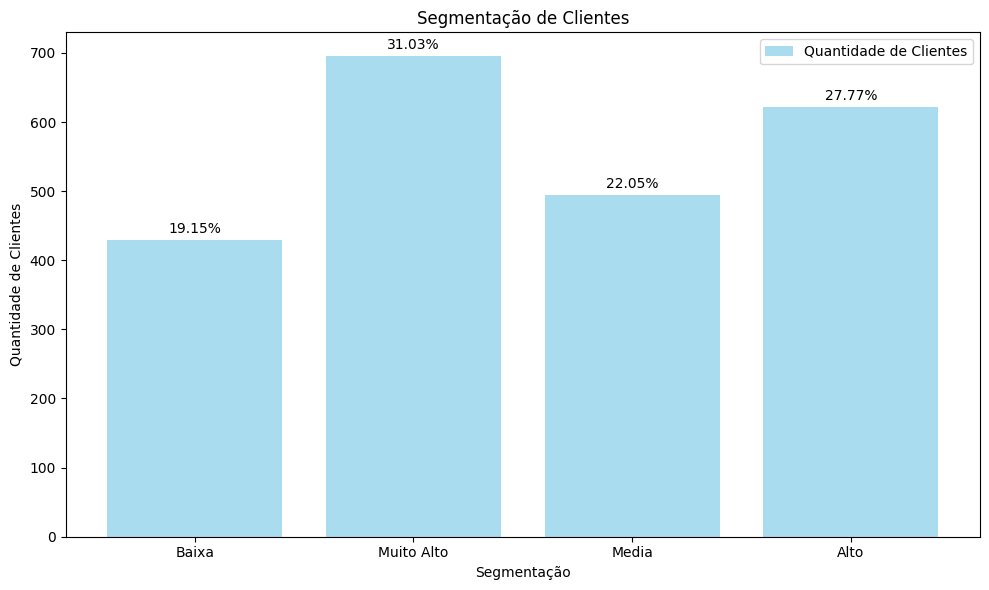

In [106]:
# Contagem de clientes em cada segmentação
segment_counts = rfm['Cluster'].value_counts().sort_index()

# Porcentagem de clientes em cada segmentação
segment_percentages = segment_counts / segment_counts.sum() * 100

# Nomes das segmentações
segment_names = ['Baixa', 'Muito Alto', 'Media', 'Alto']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(segment_names, segment_counts, color='skyblue', alpha=0.7, label='Quantidade de Clientes')
plt.ylabel('Quantidade de Clientes')
plt.xlabel('Segmentação')
plt.title('Segmentação de Clientes')

# Adicionar as porcentagens acima de cada barra
for i, count in enumerate(segment_counts):
    plt.text(i, count + 10, f'{segment_percentages[i]:.2f}%', ha='center')

plt.legend()
plt.tight_layout()
plt.show()


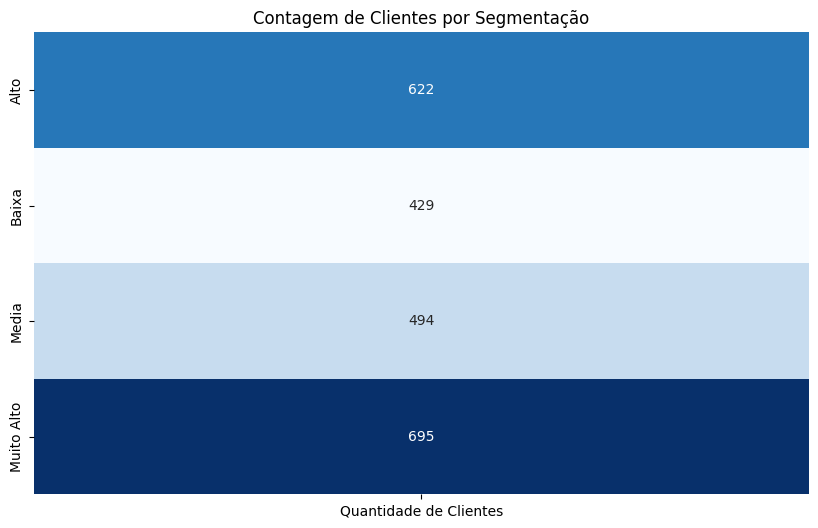

In [107]:
# Transformar os dados em um DataFrame para facilitar a visualização
segment_data = pd.DataFrame({'Segmentação': segment_names, 'Quantidade de Clientes': segment_counts})

# Ordenar o DataFrame pela ordem das segmentações
segment_data = segment_data.sort_values(by='Segmentação')

# Criar o mapa de calor
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(segment_data.set_index('Segmentação'), annot=True, fmt='g', cmap='Blues', cbar=False)
heatmap.set_ylabel('')  # Remover o rótulo do eixo y para melhorar a aparência
plt.title('Contagem de Clientes por Segmentação')
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1304: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1311: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/usr/local/lib/python3.10/dist-packages/matplotlib/ticker.py:521: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)


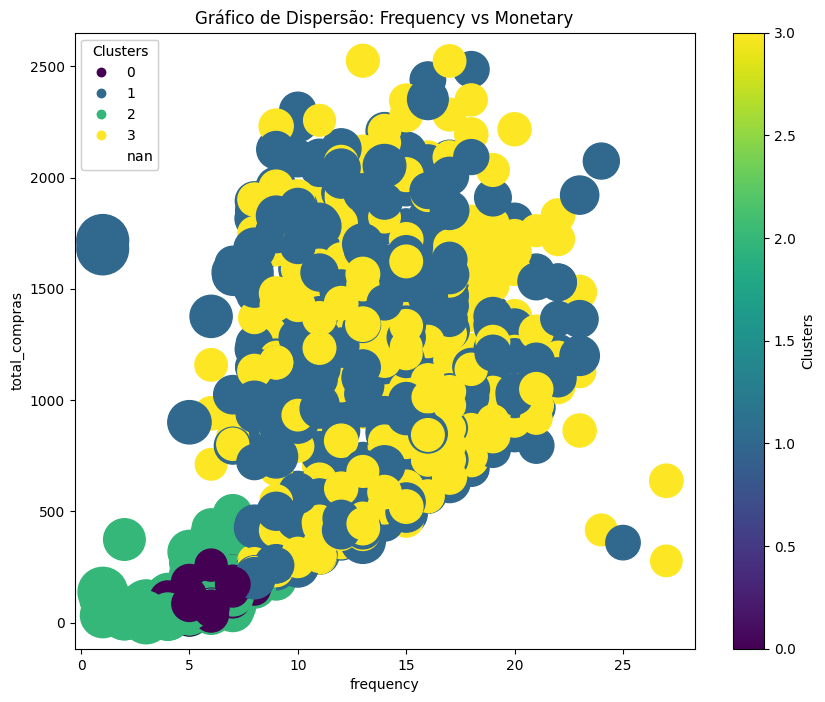

In [110]:
XVariable = "frequency"
YVariable = "total_compras"
ZVariable = "recency"

x = rfm[XVariable]
y = rfm[YVariable]
z = rfm[ZVariable]

fig, ax = plt.subplots(figsize=(10, 8))

# Defina as cores dos pontos com base nos clusters
colors = ['blue', 'green', 'red', 'cyan', 'magenta']
scatter = ax.scatter(x, y, c=rfm["Cluster"], s=z, cmap='viridis')

# Adicione uma legenda para os clusters
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Clusters")
ax.add_artist(legend1)

# Adicione uma barra de cores para a legenda dos clusters
cbar = plt.colorbar(scatter)
cbar.set_label('Clusters')

# Adicione rótulos aos eixos
plt.xlabel(XVariable)
plt.ylabel(YVariable)

plt.title('Gráfico de Dispersão: Frequency vs Monetary')
plt.show()


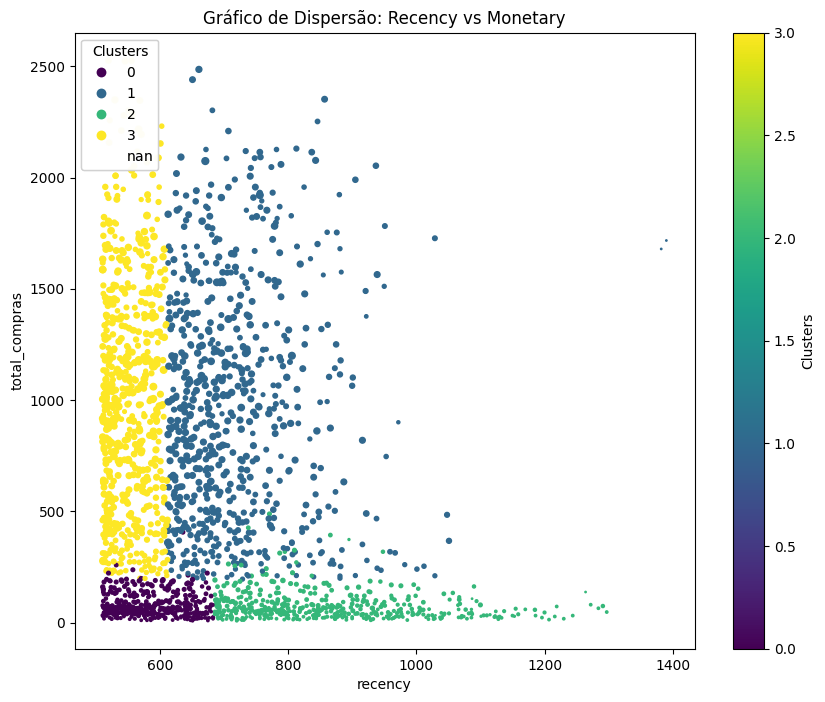

In [111]:
XVariable = "recency"
YVariable = "total_compras"
ZVariable = "frequency"

x = rfm[XVariable]
y = rfm[YVariable]
z = rfm[ZVariable]

fig, ax = plt.subplots(figsize=(10, 8))

# Defina as cores dos pontos com base nos clusters
colors = ['blue', 'green', 'red', 'cyan', 'magenta']
scatter = ax.scatter(x, y, c=rfm["Cluster"], s=z, cmap='viridis')

# Adicione uma legenda para os clusters
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Clusters")
ax.add_artist(legend1)

# Adicione uma barra de cores para a legenda dos clusters
cbar = plt.colorbar(scatter)
cbar.set_label('Clusters')

# Adicione rótulos aos eixos
plt.xlabel(XVariable)
plt.ylabel(YVariable)

plt.title('Gráfico de Dispersão: Recency vs Monetary')
plt.show()


Analise de Coorte: é uma técnica poderosa **usada em marketing** e análise de clientes para entender o **comportamento do cliente** ao longo do tempo. Ela **divide** os clientes em grupos com base em um evento compartilhado, como a primeira compra ou o registro, e analisa como esses grupos se comportam ao longo do tempo.

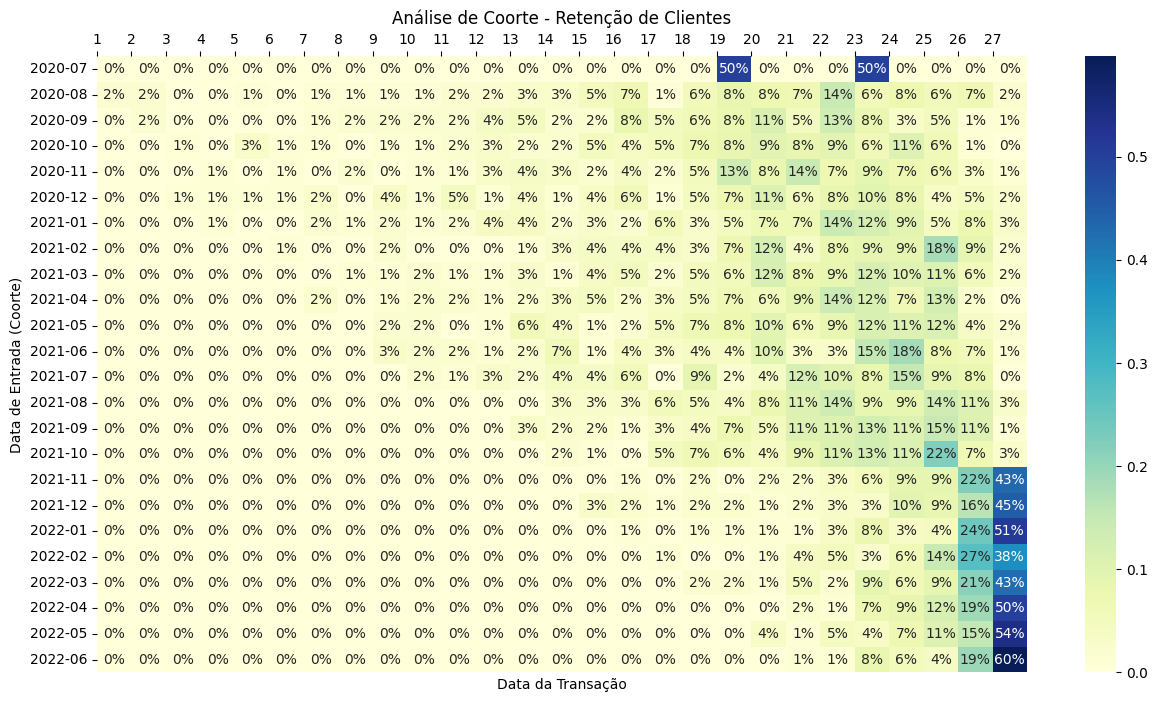

In [112]:
# Criar a coluna de coorte
df['coorte'] = df['data_entrada'].dt.to_period('M')

# Criar a coluna de período relativo apenas para as linhas válidas
df['periodo_relativo'] = (df['ultima_transancao'] - df['data_entrada']).dt.days

# Criar a tabela de coorte agrupando por 'data_entrada' e 'ultima_transacao'
coorte_tabela = df.pivot_table(index=df['data_entrada'].dt.to_period('M'),
                               columns=df['ultima_transancao'].dt.to_period('M'),
                               values='periodo_relativo',
                               aggfunc='count').fillna(0)

# Calcular a taxa de retenção
tamanho_coorte = coorte_tabela.sum(axis=1)
retencao_coorte = coorte_tabela.divide(tamanho_coorte, axis=0)

# Visualizar a análise de coorte
plt.figure(figsize=(15, 8))

# Ajustando o mapa de cores para destacar os valores diferentes de zero
sns.heatmap(retencao_coorte, annot=True, fmt='.0%', cmap='YlGnBu')

# Adicionando os meses acima do gráfico
plt.xticks(ticks=range(0, len(retencao_coorte.columns)), labels=range(1, len(retencao_coorte.columns) + 1))

# Posicionar os meses acima do gráfico
plt.tick_params(axis='x', bottom=False, labelbottom=False, top=True, labeltop=True)

plt.title('Análise de Coorte - Retenção de Clientes')
plt.ylabel('Data de Entrada (Coorte)')
plt.xlabel('Data da Transação')
plt.show()


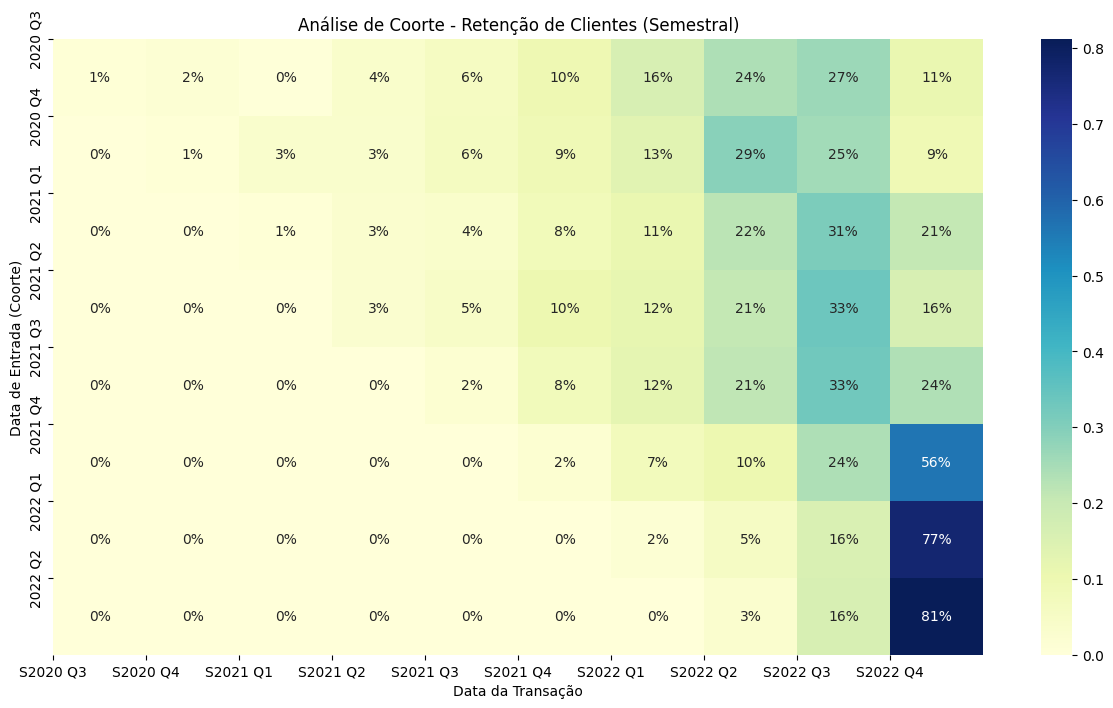

In [113]:
# Criar a coluna de coorte semestral
df['coorte'] = df['data_entrada'].dt.to_period('Q')

# Criar a tabela de coorte agrupando por 'data_entrada' e 'ultima_transacao'
coorte_tabela = df.pivot_table(index=df['data_entrada'].dt.to_period('Q'),
                               columns=df['ultima_transancao'].dt.to_period('Q'),
                               values='periodo_relativo',
                               aggfunc='count').fillna(0)

# Calcular a taxa de retenção
tamanho_coorte = coorte_tabela.sum(axis=1)
retencao_coorte = coorte_tabela.divide(tamanho_coorte, axis=0)

# Visualizar a análise de coorte
plt.figure(figsize=(15, 8))

# Ajustando o mapa de cores para destacar os valores diferentes de zero
sns.heatmap(retencao_coorte, annot=True, fmt='.0%', cmap='YlGnBu')

# Adicionando os meses acima do gráfico
meses_labels = [(f"S{i.year} Q{i.quarter}") for i in retencao_coorte.columns]
plt.xticks(ticks=range(0, len(retencao_coorte.columns)), labels=meses_labels)

# Adicionando as datas na parte inferior do gráfico
datas_labels = [(f"{i.year} Q{i.quarter}") for i in retencao_coorte.index]
plt.yticks(ticks=range(0, len(retencao_coorte.index)), labels=datas_labels)

plt.title('Análise de Coorte - Retenção de Clientes (Semestral)')
plt.xlabel('Data da Transação')
plt.ylabel('Data de Entrada (Coorte)')
plt.show()


Hierarchical Clustering: Ao **contrário do K-means**, onde o número de clusters precisa ser especificado, no hierarchical clustering, a estrutura de clusters **é formada de forma hierárquica**. Isso significa que você não precisa especificar o número de clusters antecipadamente. O algoritmo forma uma árvore de clusters (dendrograma), onde você pode escolher o número ideal de clusters visualmente.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


      idade  total_compras  cluster
0        67           1617        0
1        70             27        1
2        59            776        0
3        40             53        2
4        43            422        2
...     ...            ...      ...
2235     57           1341        0
2236     78            444        1
2237     43           1241        0
2238     68            843        0
2239     70            172        1

[2240 rows x 3 columns]


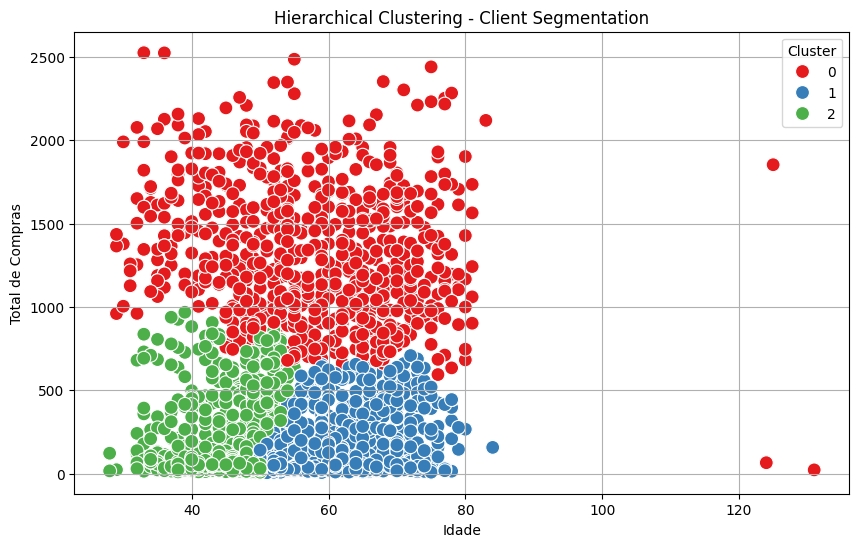

In [151]:
from sklearn.cluster import AgglomerativeClustering

# Selecionar as características que você deseja usar para segmentar os clientes
# Exemplo: selecionei 'idade' e 'renda_anual', você pode escolher outras colunas
X = df[['idade', 'total_compras']]

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Escolher o número de clusters (ou deixar para o algoritmo decidir)
# Por padrão, vamos definir 3 clusters
#n_clusters = 3

# Aplicar Hierarchical Clustering
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_scaled)

# Adicionar os rótulos de cluster de volta ao DataFrame original
df['cluster'] = cluster.labels_

# Imprimir os dados com os clusters atribuídos em números
print(df[['idade', 'total_compras', 'cluster']])

# Visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='idade', y='total_compras', hue='cluster', palette='Set1', s=100)
plt.title('Hierarchical Clustering - Client Segmentation')
plt.xlabel('Idade')
plt.ylabel('Total de Compras')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


      idade  frequencia  total_compras  cluster
0        67          12           1617        2
1        70           3             27        0
2        59          18            776        2
3        40           6             53        0
4        43          11            422        1
...     ...         ...            ...      ...
2235     57          13           1341        1
2236     78          13            444        2
2237     43          15           1241        1
2238     68          16            843        2
2239     70           7            172        0

[2240 rows x 4 columns]


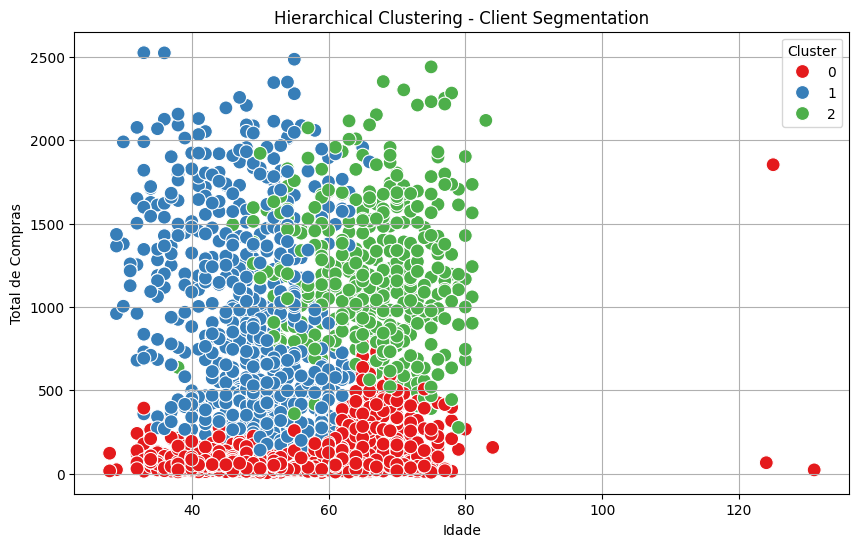

In [152]:
# Selecionar as características que você deseja usar para segmentar os clientes
X = df[['idade', 'frequencia', 'total_compras']]

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar Hierarchical Clustering
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_scaled)

# Adicionar os rótulos de cluster de volta ao DataFrame original
df['cluster'] = cluster.labels_

# Imprimir os dados com os clusters atribuídos em números
print(df[['idade', 'frequencia', 'total_compras', 'cluster']])

# Visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='idade', y='total_compras', hue='cluster', palette='Set1', s=100)
plt.title('Hierarchical Clustering - Client Segmentation')
plt.xlabel('Idade')
plt.ylabel('Total de Compras')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Este algoritmo agrupa pontos com **base na densidade** de pontos em torno deles. Ele é capaz de identificar clusters de **forma arbitrária**, pode **lidar com ruídos** e não requer a especificação do número de clusters.

      idade  frequencia  total_compras  cluster
0        67          12           1617        0
1        70           3             27        0
2        59          18            776        0
3        40           6             53        0
4        43          11            422        0
...     ...         ...            ...      ...
2235     57          13           1341        0
2236     78          13            444        0
2237     43          15           1241        0
2238     68          16            843        0
2239     70           7            172        0

[2240 rows x 4 columns]


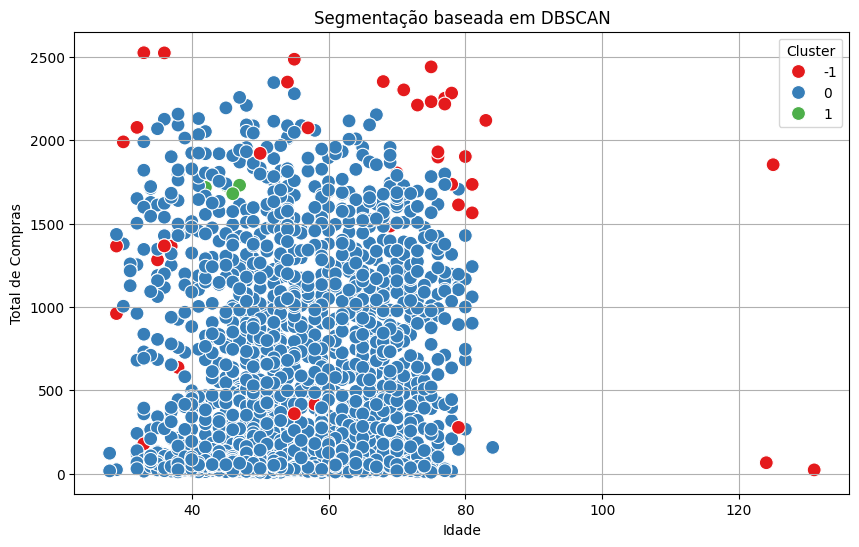

In [169]:
from sklearn.cluster import DBSCAN

# Selecionar as características que você deseja usar para segmentar os clientes
X = df[['idade', 'frequencia', 'total_compras']]

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Criar e treinar o modelo DBSCAN
modelo_dbscan = DBSCAN(eps=0.5, min_samples=5)
modelo_dbscan.fit(X_scaled)

# Adicionar os rótulos de cluster de volta ao DataFrame original
df['cluster'] = modelo_dbscan.labels_

# Imprimir os dados com os clusters atribuídos em números
print(df[['idade', 'frequencia', 'total_compras', 'cluster']])

# Visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='idade', y='total_compras', hue='cluster', palette='Set1', s=100)
plt.title('Segmentação baseada em DBSCAN')
plt.xlabel('Idade')
plt.ylabel('Total de Compras')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
